In [29]:
#Importing the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib3
import re
import time

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
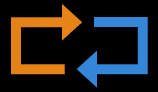

In [2]:
#Sending a request to the website and getting the HTML of the page
r = requests.get('https://www.billboard.com/charts/hot-100/').content
soup = BeautifulSoup(r, 'html.parser')
print(soup.prettify())

In [3]:
#Getting the number one song
n1_song = soup.find_all('h3', attrs={'class': 'c-title a-font-primary-bold-l a-font-primary-bold-m@mobile-max lrv-u-color-black u-color-white@mobile-max lrv-u-margin-r-150'})

In [4]:
#Printing the number one song
n1_song

[<h3 class="c-title a-font-primary-bold-l a-font-primary-bold-m@mobile-max lrv-u-color-black u-color-white@mobile-max lrv-u-margin-r-150" id="">
 <a class="c-title__link lrv-a-unstyle-link" href="#">
 	
 		
 					We Can't Be Friends (Wait For Your Love)		
 					</a>
 </h3>]

In [5]:
# Extracting the song names
songs = soup.find_all('h3', attrs={'class': 'c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only'})

In [6]:
#Printing the song names
songs

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Lose Control		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Beautiful Things		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Carnival		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-

In [7]:
#Getting the number one artist
n1_artist = soup.find_all('span', attrs={'c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet'})

In [8]:
#Extracting the artist names and cleaning the data to remove the html tags
artists = soup.find_all('span', attrs={'class': 'c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only'})

In [9]:
#Printing the number one artist name
n1_artist

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Ariana Grande
 </span>]

In [10]:
#Printing the artist names
artists

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Teddy Swims
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Benson Boone
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	¥$: Ye &amp; Ty Dolla $ign Featuring Rich The Kid &amp; Playboi Carti
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-

In [11]:
#Cleaning number one song and artist
n1_song = n1_song[0].text.strip()
n1_artist = n1_artist[0].text.strip()

In [12]:
#Creating a dataframe to store the data
df = pd.DataFrame({
    "Song": [song.text for song in songs],
    "Artist": [artist.text for artist in artists]
})

df

,Song,Artist
0,\n\n\t\n\t\n\t\t\n\t\t\t\t\tLose Control\t\t\n...,\n\t\n\tTeddy Swims\n
1,\n\n\t\n\t\n\t\t\n\t\t\t\t\tBeautiful Things\t...,\n\t\n\tBenson Boone\n
2,\n\n\t\n\t\n\t\t\n\t\t\t\t\tCarnival\t\t\n\t\n,\n\t\n\t¥$: Ye & Ty Dolla $ign Featuring Rich ...
3,\n\n\t\n\t\n\t\t\n\t\t\t\t\tLovin On Me\t\t\n\t\n,\n\t\n\tJack Harlow\n
4,\n\n\t\n\t\n\t\t\n\t\t\t\t\tTexas Hold 'Em\t\t...,\n\t\n\tBeyonce\n
...,...,...
94,\n\n\t\n\t\n\t\t\n\t\t\t\t\tBack Then Right No...,\n\t\n\tTyler Hubbard\n
95,\n\n\t\n\t\n\t\t\n\t\t\t\t\tTourniquet\t\t\n\t\n,\n\t\n\tZach Bryan\n
96,\n\n\t\n\t\n\t\t\n\t\t\t\t\tOutskirts\t\t\n\t\n,\n\t\n\tSam Hunt\n
97,\n\n\t\n\t\n\t\t\n\t\t\t\t\tWorth It\t\t\n\t\n,\n\t\n\tOffset & Don Toliver\n


In [13]:
#Adding the number one song and artist to the dataframe with the rest of the songs
new_row = {"Song": n1_song, "Artist": n1_artist}
df.loc[len(df)] = new_row
df = df.reset_index(drop=True)


In [14]:
#Put the last row on the top
df = pd.concat([df.iloc[-1:], df.iloc[:-1]], axis=0).reset_index(drop=True)
df

,Song,Artist
0,We Can't Be Friends (Wait For Your Love),Ariana Grande
1,\n\n\t\n\t\n\t\t\n\t\t\t\t\tLose Control\t\t\n...,\n\t\n\tTeddy Swims\n
2,\n\n\t\n\t\n\t\t\n\t\t\t\t\tBeautiful Things\t...,\n\t\n\tBenson Boone\n
3,\n\n\t\n\t\n\t\t\n\t\t\t\t\tCarnival\t\t\n\t\n,\n\t\n\t¥$: Ye & Ty Dolla $ign Featuring Rich ...
4,\n\n\t\n\t\n\t\t\n\t\t\t\t\tLovin On Me\t\t\n\t\n,\n\t\n\tJack Harlow\n
...,...,...
95,\n\n\t\n\t\n\t\t\n\t\t\t\t\tBack Then Right No...,\n\t\n\tTyler Hubbard\n
96,\n\n\t\n\t\n\t\t\n\t\t\t\t\tTourniquet\t\t\n\t\n,\n\t\n\tZach Bryan\n
97,\n\n\t\n\t\n\t\t\n\t\t\t\t\tOutskirts\t\t\n\t\n,\n\t\n\tSam Hunt\n
98,\n\n\t\n\t\n\t\t\n\t\t\t\t\tWorth It\t\t\n\t\n,\n\t\n\tOffset & Don Toliver\n


In [15]:
#Cleaning the song names and the artist names
df['Song'] = df['Song'].str.replace('\n', '').str.replace('\t', '')
df['Artist'] = df['Artist'].str.replace('\n', '').str.replace('\t', '')
df

,Song,Artist
0,We Can't Be Friends (Wait For Your Love),Ariana Grande
1,Lose Control,Teddy Swims
2,Beautiful Things,Benson Boone
3,Carnival,¥$: Ye & Ty Dolla $ign Featuring Rich The Kid ...
4,Lovin On Me,Jack Harlow
...,...,...
95,Back Then Right Now,Tyler Hubbard
96,Tourniquet,Zach Bryan
97,Outskirts,Sam Hunt
98,Worth It,Offset & Don Toliver


In [16]:
#Saving the dataframe to a csv file
df.to_csv('billboard_hot_100.csv', index=False)

In [17]:
#Scraping now the 100 greatest heavy songs from the Rolling Stone website
rolling = requests.get('https://www.rollingstone.com/music/music-lists/100-greatest-heavy-metal-songs-1234688425/')
print(rolling.status_code)

200


In [18]:
#Getting the HTML of the page
rolling = rolling.content
soup = BeautifulSoup(rolling, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!--
		 _     _ _           ____          _          _____ _    ___
		| |   (_) | _____   / ___|___   __| | ___    | ____| |__|__ \
		| |   | | |/ / _ \ | |   / _ \ / _` |/ _ \   |  _| | '_ \ / /
		| |___| |   <  __/ | |__| (_) | (_| |  __/_  | |___| | | |_|
		|_____|_|_|\_\___|  \____\___/ \__,_|\___( ) |_____|_| |_(_)
												  |/

		 Work on Rolling Stone and other iconic brands!

		 Visit our careers page at https://pmc.com/careers/

-->
   <meta content="The 100 Greatest Heavy Metal Songs of Al

In [19]:
#Extracting the song names, located in an h2 tag inside an article tag
articles = soup.find_all('article', class_='pmc-fallback-list-item')
heavy_songs = []
for article in articles:
    heavy_songs.append(article.find('h2').text.strip())

In [20]:
#Checking the results
heavy_songs

['‘Welcome to Hell,’ Venom',
 '‘Planets Collide,’ Crowbar',
 '‘Executioner’s Tax (Swing of the Axe),’ Power Trip',
 '‘43% Burnt,’ The Dillinger Escape Plan',
 '‘Yeah Right,’ Girlschool',
 '‘Davidian,’ Machine Head',
 '‘In the Meantime,’ Helmet',
 '‘Hammer Smashed Face,’ Cannibal Corpse',
 '‘All We Are,’ Warlock',
 '‘Pull Me Under,’ Dream Theater',
 '‘Bring the Noise,’ Public Enemy feat. Anthrax',
 '‘You Can’t Bring Me Down,’ Suicidal Tendencies',
 '‘This Time,’ Life of Agony',
 '‘Slaughter of the Soul,’ At the Gates',
 '’21st Century Schizoid Man,’ King Crimson',
 '‘There Goes the Neighborhood,’ Body Count',
 '‘Thunder Kiss ’65,’ White Zombie',
 '‘World Eater,’ Bolt Thrower',
 '‘Spit,’ Kittie',
 '‘We’re Not Gonna Take It,’ Twisted Sister',
 '‘My Own Summer (Shove It),’ Deftones',
 '‘Balls to the Wall,’ Accept',
 '‘Concubine,’ Converge',
 '‘Jesus Christ Pose,’ Soundgarden',
 '‘A Fine Day to Die,’ Bathory',
 '‘Youth Gone Wild,’ Skid Row',
 '‘Chopped in Half,’ Obituary',
 '‘Du Hast,’ Ramm

In [21]:
separated_data = []
for song in heavy_songs:
    if ',' in song:
        parts = song.split(',')
        song_name = parts[0].strip()
        artist_name = ','.join(parts[1:]).strip()
        separated_data.append({"Song": song_name, "Artist": artist_name})   
    else:
        separated_data.append({"Song": song, "Artist": None})

for song in separated_data:
    print(song)


{'Song': '‘Welcome to Hell', 'Artist': '’ Venom'}
{'Song': '‘Planets Collide', 'Artist': '’ Crowbar'}
{'Song': '‘Executioner’s Tax (Swing of the Axe)', 'Artist': '’ Power Trip'}
{'Song': '‘43% Burnt', 'Artist': '’ The Dillinger Escape Plan'}
{'Song': '‘Yeah Right', 'Artist': '’ Girlschool'}
{'Song': '‘Davidian', 'Artist': '’ Machine Head'}
{'Song': '‘In the Meantime', 'Artist': '’ Helmet'}
{'Song': '‘Hammer Smashed Face', 'Artist': '’ Cannibal Corpse'}
{'Song': '‘All We Are', 'Artist': '’ Warlock'}
{'Song': '‘Pull Me Under', 'Artist': '’ Dream Theater'}
{'Song': '‘Bring the Noise', 'Artist': '’ Public Enemy feat. Anthrax'}
{'Song': '‘You Can’t Bring Me Down', 'Artist': '’ Suicidal Tendencies'}
{'Song': '‘This Time', 'Artist': '’ Life of Agony'}
{'Song': '‘Slaughter of the Soul', 'Artist': '’ At the Gates'}
{'Song': '’21st Century Schizoid Man', 'Artist': '’ King Crimson'}
{'Song': '‘There Goes the Neighborhood', 'Artist': '’ Body Count'}
{'Song': '‘Thunder Kiss ’65', 'Artist': '’ White

In [22]:
#Creating a dataframe to store the data
df_rolling = pd.DataFrame(separated_data)
df_rolling

,Song,Artist
0,‘Welcome to Hell,’ Venom
1,‘Planets Collide,’ Crowbar
2,‘Executioner’s Tax (Swing of the Axe),’ Power Trip
3,‘43% Burnt,’ The Dillinger Escape Plan
4,‘Yeah Right,’ Girlschool
5,‘Davidian,’ Machine Head
6,‘In the Meantime,’ Helmet
7,‘Hammer Smashed Face,’ Cannibal Corpse
8,‘All We Are,’ Warlock
9,‘Pull Me Under,’ Dream Theater


In [23]:
#Cleaning the song names and the artist names
df_rolling['Song'] = df_rolling['Song'].str.replace("‘", "")
df_rolling['Artist'] = df_rolling['Artist'].str.replace("’", "")

In [25]:
#Saving the dataframe to a csv file
df_rolling.to_csv('rolling_stone_heavy_metal.csv', index=False)

As the webpage is dynamic, using only BeautifulSoup will not be enough, so I will try to use Selenium

In [34]:
#Trying to scrape the rolling stone webpage using Selenium
#First, we will create the driver object and open the browser window

path = 'C:/Users/Samu/Documents/chromedriver-win64/chromedriver.exe'
driver = webdriver.Chrome()

In [35]:
#Navigating to the webpage
driver.get('https://www.rollingstone.com/music/music-lists/100-greatest-heavy-metal-songs-1234688425/')

In [36]:
#Now I will try to create the object to interact with the "Load More" button at the bottom of the webpage
loadButton = driver.find_element(By.CLASS_NAME, "c-gallery-vertical__load-button")

In [38]:
#Having the button created, we will start to scrape the data using Selenium
#As we know there's only one click required, we will scrape the data from the first page and then click the button to get the rest of the data from the second page
# Scrape data from the first page
soup = BeautifulSoup(driver.page_source, 'html.parser')
articles = soup.find_all('article', class_='pmc-fallback-list-item')
heavy_songs = []
for article in articles:
    heavy_songs.append(article.find('h2').text.strip())

#Click the button to load more data
loadButton.click()

['‘Welcome to Hell,’ Venom',
 '‘Planets Collide,’ Crowbar',
 '‘Executioner’s Tax (Swing of the Axe),’ Power Trip',
 '‘43% Burnt,’ The Dillinger Escape Plan',
 '‘Yeah Right,’ Girlschool',
 '‘Davidian,’ Machine Head',
 '‘In the Meantime,’ Helmet',
 '‘Hammer Smashed Face,’ Cannibal Corpse',
 '‘All We Are,’ Warlock',
 '‘Pull Me Under,’ Dream Theater',
 '‘Bring the Noise,’ Public Enemy feat. Anthrax',
 '‘You Can’t Bring Me Down,’ Suicidal Tendencies',
 '‘This Time,’ Life of Agony',
 '‘Slaughter of the Soul,’ At the Gates',
 '’21st Century Schizoid Man,’ King Crimson',
 '‘There Goes the Neighborhood,’ Body Count',
 '‘Thunder Kiss ’65,’ White Zombie',
 '‘World Eater,’ Bolt Thrower',
 '‘Spit,’ Kittie',
 '‘We’re Not Gonna Take It,’ Twisted Sister',
 '‘My Own Summer (Shove It),’ Deftones',
 '‘Balls to the Wall,’ Accept',
 '‘Concubine,’ Converge',
 '‘Jesus Christ Pose,’ Soundgarden',
 '‘A Fine Day to Die,’ Bathory',
 '‘Youth Gone Wild,’ Skid Row',
 '‘Chopped in Half,’ Obituary',
 '‘Du Hast,’ Ramm

In [39]:
# Scrape data from the second page
soup = BeautifulSoup(driver.page_source, 'html.parser')
articles = soup.find_all('article', class_='c-gallery-vertical-featured-image')
for article in articles:
    heavy_songs.append(article.find('h2').text.strip())

#Checking the results
heavy_songs

['‘Welcome to Hell,’ Venom',
 '‘Planets Collide,’ Crowbar',
 '‘Executioner’s Tax (Swing of the Axe),’ Power Trip',
 '‘43% Burnt,’ The Dillinger Escape Plan',
 '‘Yeah Right,’ Girlschool',
 '‘Davidian,’ Machine Head',
 '‘In the Meantime,’ Helmet',
 '‘Hammer Smashed Face,’ Cannibal Corpse',
 '‘All We Are,’ Warlock',
 '‘Pull Me Under,’ Dream Theater',
 '‘Bring the Noise,’ Public Enemy feat. Anthrax',
 '‘You Can’t Bring Me Down,’ Suicidal Tendencies',
 '‘This Time,’ Life of Agony',
 '‘Slaughter of the Soul,’ At the Gates',
 '’21st Century Schizoid Man,’ King Crimson',
 '‘There Goes the Neighborhood,’ Body Count',
 '‘Thunder Kiss ’65,’ White Zombie',
 '‘World Eater,’ Bolt Thrower',
 '‘Spit,’ Kittie',
 '‘We’re Not Gonna Take It,’ Twisted Sister',
 '‘My Own Summer (Shove It),’ Deftones',
 '‘Balls to the Wall,’ Accept',
 '‘Concubine,’ Converge',
 '‘Jesus Christ Pose,’ Soundgarden',
 '‘A Fine Day to Die,’ Bathory',
 '‘Youth Gone Wild,’ Skid Row',
 '‘Chopped in Half,’ Obituary',
 '‘Du Hast,’ Ramm

In [40]:
#Cleaning the data
separated_data = []
for song in heavy_songs:
    if ',' in song:
        parts = song.split(',')
        song_name = parts[0].strip()
        artist_name = ','.join(parts[1:]).strip()
        separated_data.append({"Song": song_name, "Artist": artist_name})   
    else:
        separated_data.append({"Song": song, "Artist": None})

for song in separated_data:
    print(song)

{'Song': '‘Welcome to Hell', 'Artist': '’ Venom'}
{'Song': '‘Planets Collide', 'Artist': '’ Crowbar'}
{'Song': '‘Executioner’s Tax (Swing of the Axe)', 'Artist': '’ Power Trip'}
{'Song': '‘43% Burnt', 'Artist': '’ The Dillinger Escape Plan'}
{'Song': '‘Yeah Right', 'Artist': '’ Girlschool'}
{'Song': '‘Davidian', 'Artist': '’ Machine Head'}
{'Song': '‘In the Meantime', 'Artist': '’ Helmet'}
{'Song': '‘Hammer Smashed Face', 'Artist': '’ Cannibal Corpse'}
{'Song': '‘All We Are', 'Artist': '’ Warlock'}
{'Song': '‘Pull Me Under', 'Artist': '’ Dream Theater'}
{'Song': '‘Bring the Noise', 'Artist': '’ Public Enemy feat. Anthrax'}
{'Song': '‘You Can’t Bring Me Down', 'Artist': '’ Suicidal Tendencies'}
{'Song': '‘This Time', 'Artist': '’ Life of Agony'}
{'Song': '‘Slaughter of the Soul', 'Artist': '’ At the Gates'}
{'Song': '’21st Century Schizoid Man', 'Artist': '’ King Crimson'}
{'Song': '‘There Goes the Neighborhood', 'Artist': '’ Body Count'}
{'Song': '‘Thunder Kiss ’65', 'Artist': '’ White

In [41]:
#Creating a dataframe to store the data
df_rolling = pd.DataFrame(separated_data)
df_rolling

,Song,Artist
0,‘Welcome to Hell,’ Venom
1,‘Planets Collide,’ Crowbar
2,‘Executioner’s Tax (Swing of the Axe),’ Power Trip
3,‘43% Burnt,’ The Dillinger Escape Plan
4,‘Yeah Right,’ Girlschool
...,...,...
95,‘War Pigs,’ Black Sabbath
96,‘Breaking the Law,’ Judas Priest
97,‘Ace of Spades,’ Motörhead
98,‘Master of Puppets,’ Metallica


In [42]:
#Cleaning the song names and the artist names
df_rolling['Song'] = df_rolling['Song'].str.replace("‘", "")
df_rolling['Artist'] = df_rolling['Artist'].str.replace("’", "")

In [43]:
df_rolling

,Song,Artist
0,Welcome to Hell,Venom
1,Planets Collide,Crowbar
2,Executioner’s Tax (Swing of the Axe),Power Trip
3,43% Burnt,The Dillinger Escape Plan
4,Yeah Right,Girlschool
...,...,...
95,War Pigs,Black Sabbath
96,Breaking the Law,Judas Priest
97,Ace of Spades,Motörhead
98,Master of Puppets,Metallica
